In [1]:
# Credit goes to https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/
import matplotlib.pyplot as plt
import numpy as np
import string

# points a, b and, c
a, b, c, d = (0, 1, 0), (1, 0, 1), (0, -1, 2), (-1, 0, 3)

# matrix with row vectors of points
A = np.array([a, b, c, d])

# 3x3 Identity transformation matrix
I = np.eye(3)

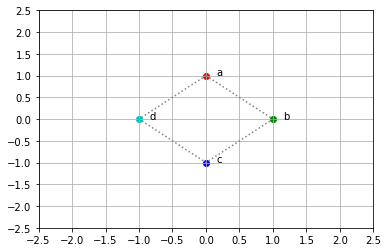

In [2]:
color_lut = 'rgbc'
fig = plt.figure()
ax = plt.gca()
xs = []
ys = []
for row in A:
    output_row = I @ row
    x, y, i = output_row
    xs.append(x)
    ys.append(y)
    i = int(i) # convert float to int for indexing
    c = color_lut[i]
    plt.scatter(x, y, color=c)
    plt.text(x + 0.15, y, f"{string.ascii_letters[i]}")
xs.append(xs[0])
ys.append(ys[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()


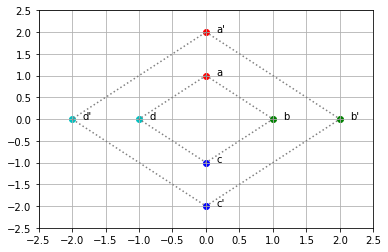

In [3]:
# create the scaling transformation matrix
T_s = np.array([[2, 0, 0], [0, 2, 0], [0, 0, 1]])

fig = plt.figure()
ax = plt.gca()
xs_s = []
ys_s = []
for row in A:
    output_row = T_s @ row
    x, y, i = row
    x_s, y_s, i_s = output_row
    xs_s.append(x_s)
    ys_s.append(y_s)
    i, i_s = int(i), int(i_s) # convert float to int for indexing
    c, c_s = color_lut[i], color_lut[i_s] # these are the same but, its good to be explicit
    plt.scatter(x, y, color=c)
    plt.scatter(x_s, y_s, color=c_s)
    plt.text(x + 0.15, y, f"{string.ascii_letters[int(i)]}")
    plt.text(x_s + 0.15, y_s, f"{string.ascii_letters[int(i_s)]}'")

xs_s.append(xs_s[0])
ys_s.append(ys_s[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
plt.plot(xs_s, ys_s, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

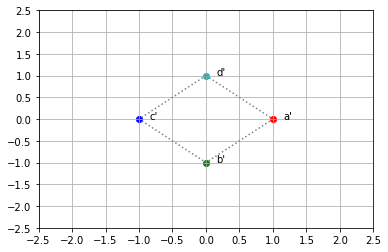

In [4]:


# create the rotation transformation matrix
T_r = np.array([[0, 1, 0], [-1, 0, 0], [0, 0, 1]])

fig = plt.figure()
ax = plt.gca()
for row in A:
    output_row = T_r @ row
    x_r, y_r, i_r = output_row
    i_r = int(i_r) # convert float to int for indexing
    c_r = color_lut[i_r] # these are the same but, its good to be explicit
    letter_r = string.ascii_letters[i_r]
    plt.scatter(x_r, y_r, color=c_r)
    plt.text(x_r + 0.15, y_r, f"{letter_r}'")

plt.plot(xs, ys, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()


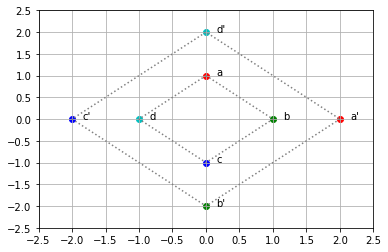

In [5]:
# create combined tranformation matrix
T = T_s @ T_r

fig = plt.figure()
ax = plt.gca()

xs_comb = []
ys_comb = []
for row in A:
    output_row = T @ row
    x, y, i = row
    x_comb, y_comb, i_comb = output_row
    xs_comb.append(x_comb)
    ys_comb.append(y_comb)
    i, i_comb = int(i), int(i_comb) # convert float to int for indexing
    c, c_comb = color_lut[i], color_lut[i_comb] # these are the same but, its good to be explicit
    letter, letter_comb = string.ascii_letters[i], string.ascii_letters[i_comb]
    plt.scatter(x, y, color=c)
    plt.scatter(x_comb, y_comb, color=c_comb)
    plt.text(x + 0.15 , y, f"{letter}")
    plt.text(x_comb + 0.15, y_comb, f"{letter_comb}'")
xs_comb.append(xs_comb[0])
ys_comb.append(ys_comb[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
plt.plot(xs_comb, ys_comb, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()



In [7]:
img=plt.imread('DSC07206.jpg')
img.shape

(1200, 1800, 3)

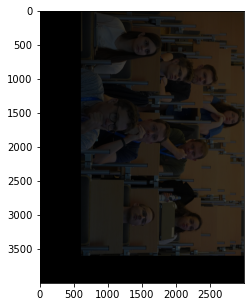

In [14]:
# 2x scaling requires a tranformation image array 2x the original image
img_transformed = np.empty((4000, 3000, 3), dtype=np.uint8)
for i, row in enumerate(img):
    for j, col in enumerate(row):
        pixel_data = img[i, j, :]
        input_coords = np.array([i, j, 1])
        i_out, j_out, _ = T @ input_coords
        img_transformed[i_out, j_out, :] = pixel_data

plt.figure(figsize=(5, 5))
plt.imshow(img_transformed)

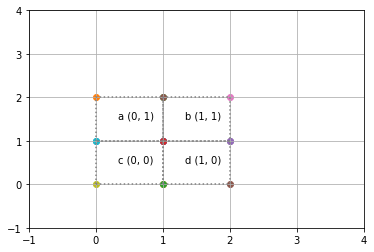

In [15]:


def plot_box(plt, x0, y0, txt, w=1, h=1):
    plt.scatter(x0, y0)
    plt.scatter(x0, y0 + h)
    plt.scatter(x0 + w, y0 + h)
    plt.scatter(x0 + w, y0)
    plt.plot([x0, x0, x0 + w, x0 + w, x0], [y0, y0 + h, y0 + h, y0, y0], color="gray", linestyle='dotted')
    plt.text(x0 + (.33 * w), y0 + (.5 * h), txt)

#             x0, y0, letter
a = np.array((0,  1,  0))
b = np.array((1,  1,  1))
c = np.array((0,  0,  2))
d = np.array((1,  0,  3))

A = np.array([a, b, c, d])
fig = plt.figure()
ax = plt.gca()
for pt in A:
    x0, y0, i = I @ pt
    x0, y0, i = int(x0), int(y0), int(i)
    plot_box(plt, x0, y0, f"{string.ascii_letters[int(i)]} ({x0}, {y0})")

ax.set_xticks(np.arange(-1, 5, 1))
ax.set_yticks(np.arange(-1, 5, 1))
plt.grid()
plt.show()


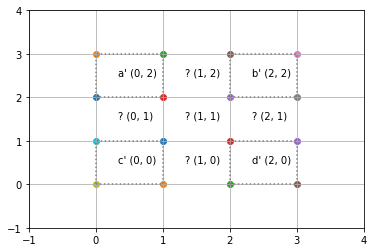

In [16]:
fig = plt.figure()
ax = plt.gca()
for pt in A:
    xt, yt, i = T_s @ pt
    xt, yt, i = int(xt), int(yt), int(i)
    plot_box(plt, xt, yt, f"{string.ascii_letters[i]}' ({xt}, {yt})")

delta_w, delta_h = 0.33, 0.5
plt.text(0 + delta_w, 1 + delta_h, "? (0, 1)")
plt.text(1 + delta_w, 0 + delta_h, "? (1, 0)")
plt.text(1 + delta_w, 1 + delta_h, "? (1, 1)")
plt.text(1 + delta_w, 2 + delta_h, "? (1, 2)")
plt.text(2 + delta_w, 1 + delta_h, "? (2, 1)")

ax.set_xticks(np.arange(-1, 5, 1))
ax.set_yticks(np.arange(-1, 5, 1))
plt.grid()
plt.show()